<a href="https://colab.research.google.com/github/sunyingjian/-Logging-related-network/blob/master/RNN_DNN%E5%B2%A9%E6%80%A7%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font size=5px color="red">✦ *Google Colab 突破90分钟自动断开:</font>
<p><font size=3px > 每60分钟自动运行代码以刷新90分钟断开限制. 打开 developer-settings (在你的浏览器) 快速健 Ctrl+Shift+I 然后按console 输入以下代码 Enter. ( mac 按 Option+Command+I)</p><b>复制以下隐藏代码粉贴在浏览器console！！不要关闭浏览器以免失效</b>

<code>function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-connect-button").click() 
}setInterval(ClickConnect,6000)</code>

In [ ]:
#@markdown <h3>← 输入了代码后运行以防止断开</h>


import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


#引入数据

In [ ]:
! git clone https://github.com/seg/tutorials-2016.git
! git clone https://github.com/sunyingjian/numpy-.git
! git clone https://github.com/sunyingjian/Machine-Learning-From-Scratch.git

Cloning into 'tutorials-2016'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161
Receiving objects: 100% (161/161), 16.86 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Cloning into 'numpy-'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 106 (delta 6), reused 0 (delta 0), pack-reused 89
Receiving objects: 100% (106/106), 3.90 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Cloning into 'Machine-Learning-From-Scratch'...
remote: Enumerating objects: 287, done.
remote: Total 287 (delta 0), reused 0 (delta 0), pack-reused 287
Receiving objects: 100% (287/287), 91.24 KiB | 1.82 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#数据处理

In [ ]:
%matplotlib inline
#%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)#设置要显示的默认行数，显示的最大行数是10
pd.options.mode.chained_assignment = None #为了在增加列表行数的时候防止出现setting with copy warning
training_data = pd.read_csv('/content/numpy-/3345train data.csv')
training_data
testing_data = pd.read_csv('/content/numpy-/3345test_data.csv')
testing_data

,AC,CAL,GR,K,RD,SP,Core Lithology
0,0.038756,0.026970,0.094776,0.112543,0.001420,0.614504,5
1,0.347382,0.090194,0.145150,0.202335,0.002744,0.339568,7
2,0.218400,0.059510,0.252165,0.711295,0.003874,0.918567,3
3,0.366064,0.082147,0.149304,0.201731,0.003290,0.343180,7
4,0.291877,0.079981,0.141782,0.289309,0.003455,0.344605,7
...,...,...,...,...,...,...,...
361,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936,6
362,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809,3
363,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486,5
364,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641,6


In [ ]:
correct_facies_labels = np.array(training_data['Core Lithology'].values)
correct_facies_labels_test = np.array(testing_data['Core Lithology'].values)
feature_vectors = np.array(training_data.drop(['Core Lithology'], axis=1))
feature_vectors_test = np.array(testing_data.drop(['Core Lithology'], axis=1))

In [ ]:
X_train = feature_vectors.reshape([3345,-1,6]) 
X_test = feature_vectors_test.reshape([366,-1,6])
y_train = correct_facies_labels
y_test = correct_facies_labels_test

In [ ]:
X_trains = feature_vectors
X_tests = feature_vectors_test

#DNN分类

In [ ]:
import tensorflow as tf

In [ ]:
model =tf.keras.Sequential([
                            tf.keras.layers.Dense(16,input_shape=[6],activation='relu'),
                            tf.keras.layers.Dense(32,activation='relu'),
                            tf.keras.layers.Dense(6,activation='linear')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 198       
Total params: 854
Trainable params: 854
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
model.compile(loss='mse',metrics=['acc'])

In [ ]:
model.fit(X_trains,y_train,epochs=50,validation_data=(X_tests,y_test))

Epoch 1/50
105/105 [==============================] - 0s 4ms/step - loss: 17.5394 - acc: 0.0439 - val_loss: 10.6035 - val_acc: 0.0546
Epoch 2/50
105/105 [==============================] - 0s 3ms/step - loss: 5.9346 - acc: 0.0508 - val_loss: 4.2780 - val_acc: 0.1038
Epoch 3/50
105/105 [==============================] - 0s 3ms/step - loss: 4.3156 - acc: 0.0990 - val_loss: 4.1216 - val_acc: 0.0984
Epoch 4/50
105/105 [==============================] - 0s 3ms/step - loss: 4.1905 - acc: 0.0909 - val_loss: 3.9587 - val_acc: 0.1120
Epoch 5/50
105/105 [==============================] - 0s 4ms/step - loss: 4.1264 - acc: 0.0966 - val_loss: 3.8858 - val_acc: 0.1202
Epoch 6/50
105/105 [==============================] - 0s 3ms/step - loss: 4.0915 - acc: 0.1037 - val_loss: 3.8524 - val_acc: 0.1230
Epoch 7/50
105/105 [==============================] - 0s 3ms/step - loss: 4.0611 - acc: 0.1097 - val_loss: 3.8340 - val_acc: 0.1339
Epoch 8/50
105/105 [==============================] - 0s 4ms/step - loss: 

#RNN分类

In [ ]:
import tensorflow as tf
print('tensorflow:',format(tf.__version__))
import matplotlib.pyplot as plt
import numpy as np

tensorflow: 2.2.0


In [ ]:
model =  tf.keras.Sequential([
                              tf.keras.layers.GRU(64,input_shape=[None,6],return_sequences=True),
                              tf.keras.layers.Dropout(0.3),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.GRU(128,return_sequences=True),
                              tf.keras.layers.Dropout(0.3),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dense(64),
                              tf.keras.layers.Dense(7,activation='linear')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, None, 64)          13824     
_________________________________________________________________
dropout_22 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
batch_normalization_22 (Batc (None, None, 64)          256       
_________________________________________________________________
gru_23 (GRU)                 (None, None, 128)         74496     
_________________________________________________________________
dropout_23 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
batch_normalization_23 (Batc (None, None, 128)         512       
_________________________________________________________________
dense_22 (Dense)             (None, None, 64)        

In [ ]:
model.compile(optimizer='adam',loss='mse',
              metrics=['acc'])

In [ ]:
history=model.fit(X_train,y_train,
         epochs=100,
         validation_data=(X_test,y_test))

Epoch 1/100
105/105 [==============================] - 2s 21ms/step - loss: 14.9243 - acc: 0.1049 - val_loss: 4.4502 - val_acc: 0.0000e+00
Epoch 2/100
105/105 [==============================] - 1s 11ms/step - loss: 6.1178 - acc: 0.0981 - val_loss: 4.3247 - val_acc: 0.0410
Epoch 3/100
105/105 [==============================] - 1s 10ms/step - loss: 5.3543 - acc: 0.1109 - val_loss: 4.3334 - val_acc: 0.0301
Epoch 4/100
105/105 [==============================] - 1s 10ms/step - loss: 5.0633 - acc: 0.1088 - val_loss: 4.2929 - val_acc: 0.0273
Epoch 5/100
105/105 [==============================] - 1s 10ms/step - loss: 4.8883 - acc: 0.1061 - val_loss: 4.3247 - val_acc: 0.0519
Epoch 6/100
105/105 [==============================] - 1s 10ms/step - loss: 4.7289 - acc: 0.1169 - val_loss: 4.3352 - val_acc: 0.0546
Epoch 7/100
105/105 [==============================] - 1s 10ms/step - loss: 4.6722 - acc: 0.1100 - val_loss: 4.3336 - val_acc: 0.1639
Epoch 8/100
105/105 [==============================] - 1s

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

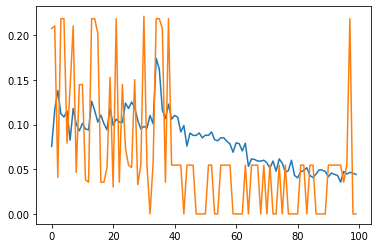

In [ ]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')

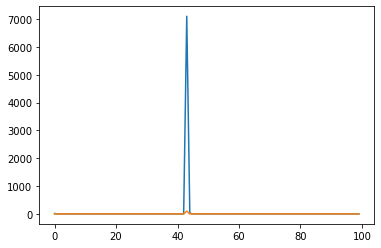

In [ ]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')

#sklearn的多层感知器

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100, ),max_iter=10000)
clf.fit(X_trains,y_train)
y_pred=clf.predict(X_tests)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'准确率{accuracy}')

准确率0.8469945355191257


#HMM隐式马尔科夫模型

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 3.5MB/s 


In [ ]:
from hmmlearn import hmm

In [ ]:
model = hmm.MultinomialHMM(n_components=len(X_trains))